# Some information about contents

In this notebook I tried to find out which contents are best sellers, which ones are most trending (meaning users add more comment on them) and which ones are most viewed.
I also answer very same questions about championship routes based on the result of above.

## Best seller contetns & championship routes:

In [175]:
import pandas as pd

In [176]:
#reading data
accessibilities = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/accessibilities.csv')
contents = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/contents.csv')
championship_routes = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/championship_routes.csv')
championships_contents = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/championships_contents.csv')

In [177]:
#counts how many each content had been sold.
num_of_sells = accessibilities['accessible_id'].value_counts()
#making a data frame from the results of above cell so we can merge it with "contents"
sells = pd.DataFrame(num_of_sells)
#renaming columns to their correct name.
sells.reset_index(inplace = True)
sells.rename(columns={'index':'accessible_id', 'accessible_id':'count'}, inplace = True)

In [178]:
#now we have all useful columns in one data frame.
best_sellers = pd.merge(sells[['accessible_id', 'count']],
               contents,
               left_on = 'accessible_id', right_on = 'id', how='inner')
#dropping unuseful columns.
best_sellers = best_sellers.drop(['author', 'guest', 'slider'], axis = 1)
#adding a new column which calculates the totla income of each content that had been sold.
best_sellers['total_income'] = best_sellers['count'] * best_sellers['price']
#setting index to content's id.
best_sellers.set_index('accessible_id', inplace = True)
#Best seller contents are:
best_sellers.head(5)

count   id                                              title  \
accessible_id                                                                  
90                76   90                     یه راه میانبر برای افزایش تراز   
109               74  109                    رتبه برتری یا شبکه های اجتماعی؟   
133               52  133  توام همش میشینی فکر میکنی هیچی قبول نمیشی و اس...   
111               51  111                                         خودکنترلی!   
188               51  188                                        چی بخونیم؟؟   

                                                     description  \
accessible_id                                                      
90             اونایی که ترازشون بالاست نه شاخ دارن نه دم! تو...   
109            ببینیم اصلا میشه با تلگرام و اینستاگرام هم رتب...   
133            گاهی اوقات فشار روانی ما برای چیزهایِ که نه تن...   
111            میدونتستی خودکنترلی استهلاک ایجاد میکنه؟؟\nاست...   
188            آقا ما دیگه آماده ایم که بریم بترکونیم!?\nبیای...   

              content_category  content_score  number_of_scores  \
accessible_id                                                     
90                    Kimia_TV           2.77                30   
109                 Kimia_Cast           3.37                27   
133                 Kimia_Cast           3.65                20   
111                 Kimia_Cast           3.89                19   
188                   Kimia_TV           3.24                17   

               number_of_comments  price  kimia_meter       mime      size  \
accessible_id                                                                
90                             16   3500            1  video/mp4  45731701   
109                             7   1900            1  audio/mp3   4653053   
133                             8   2300            1  audio/mp3   8567397   
111                             3   2500            1  audio/mp3   7703110   
188                            20   2900            1  video/mp4   7923078   

               duration           created_at  total_income  
accessible_id                                               
90                 1193  2018-10-15 00:49:57        266000  
109                 332  2018-10-30 15:30:39        140600  
133                 535  2018-12-31 12:15:59        119600  
111                 550  2018-10-30 15:47:21        127500  
188                 223  2019-03-04 19:07:19        147900

So the contents which are at the top of the data frame are the best sellers.

In [179]:
#Merging to find out beest sellers contents are from which championships routes?
best_sellers_chr = pd.merge(best_sellers,
        championships_contents,
        left_on = 'accessible_id',
        right_on = 'content_id')
best_sellers_chr = pd.merge(best_sellers_chr,
        championship_routes,
        left_on = 'championship_id',
        right_on = 'id')
best_sellers_chr = best_sellers_chr.sort_values(by = ['count'], ascending = False)
#Finding out total income of each championship routes.
#chr = championship route
best_seller_chr = best_sellers_chr.groupby('title_y').sum()
best_seller_chr = best_seller_chr.sort_values(by = ['total_income'], ascending = False)
best_seller_chr = best_seller_chr.take([0, 9], axis = 1)

best_seller_chr

count  total_income
title_y                                               
افزایش تراز                          154        586000
مدیریت زمان                          125        268100
هنر آزمون دادن ?                      76        236400
مدیریت استرس                          86        180800
درس در عید ?                          51        147900
درمان هر گونه تنبلی ?                 51         96900
تحلیل کنکور97                         42         63900
خلاصه نویسی ?                         18         54000
تحلیل آزمون?                           7         31500
برنامه ریزی در تابستان نهم به دهم      1          2900

Each championship route's total income and number of contents it sold to users.

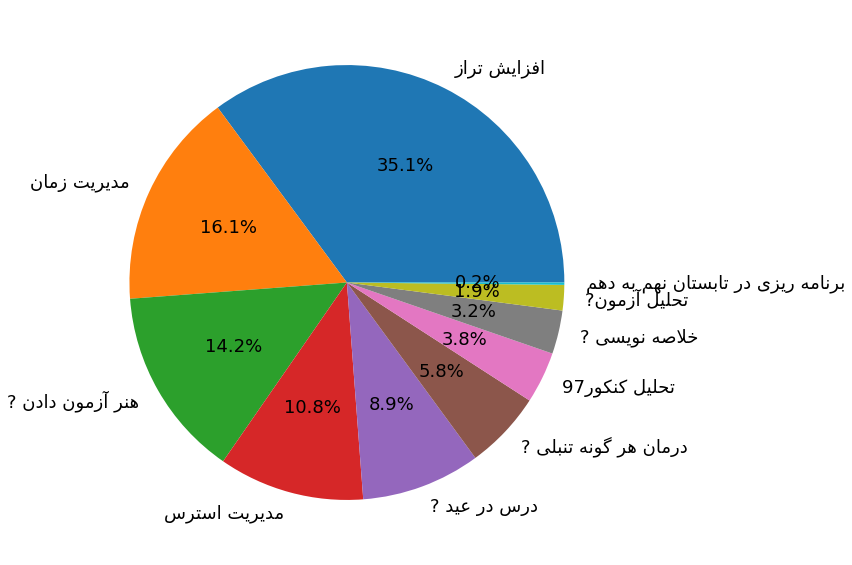

Visualized due to each championship route's total income.


In [180]:
#visualizing
titles = []
c = list(best_seller_chr['count'])
t = list(best_seller_chr['total_income'])
l = list(best_seller_chr.index)

from bidi.algorithm import get_display
import arabic_reshaper

labels = []
for data in l:
    reshaped_text = arabic_reshaper.reshape(data)
    artext = get_display(reshaped_text)
    labels.append(artext)
    
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 10)
ax1.pie(t, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.show()
print("Visualized due to each championship route's total income.")

In [181]:
#calculating total income of selling contents in the android application of the startup.
total_income = best_sellers['total_income'].sum()
print("The company's total income from selling contetns at its application is:", total_income, "Tomans.")

The company's total income from selling contetns at its application is: 1668400 Tomans.


## Most trending contents & & championship routes:

My definition of most trending is the content which has more comments.

In [182]:
import pandas as pd

In [183]:
#reading data
contents = pd.read_csv('~/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/contents.csv')
championship_routes = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/championship_routes.csv')
championships_contents = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/championships_contents.csv')

In [184]:
contents = contents.sort_values(by = ['number_of_comments'], ascending = False)
#contents are sorted due to in which one users add more comments.
contents.head()

id                        title  \
42    79  بزن بریم به سوی افزایش تراز   
114  153    چرا همش تنبلی میکنیم؟!! ?   
39    59         کتاب و کلاس کمک درسی   
49    86          راز تراز بالای 7000   
67   106    ببینیم مدرس این دوره کیه؟   

                                           description content_category  \
42   پس معلومه بالاخره میخوای یه کاری برای افزایش ت...       Kimimishen   
114  من میخوام درس بخونم ولی یه جوریه!!!\nانگار درس...       Kimia_Cast   
39   دوستات همشون میگن کلی کلاس ثبت نام کردن؟؟؟نگرا...       Kimimishen   
49   میخوام یه راز کیمیاگرانه رو بهت بگم :)\nبرای ا...         Kimia_TV   
67   معرفی محمد حسین جدیدی نژاد؛ مدرس دوره مدیریت زمان       Kimimishen   

     content_score  number_of_scores  number_of_comments  price  kimia_meter  \
42            3.30               732                  53      0            1   
114           3.51               157                  43      0            1   
39            3.08               195                  36      0            1   
49            3.41               111                  28      0            1   
67            3.16               361                  28      0            1   

                   author guest  slider       mime      size  duration  \
42                    NaN   NaN       0  video/mp4   7309029        87   
114                   NaN   NaN       0  audio/mp3   7621555       476   
39   محمد حسین جدیدی نژاد   NaN       0  video/mp4   2302616        40   
49                    NaN   NaN       0  video/mp4  77764255      2522   
67                    NaN   NaN       0  video/mp4   5208393        89   

              created_at  
42   2018-10-14 15:07:15  
114  2019-02-06 14:12:02  
39   2018-10-13 01:21:11  
49   2018-10-15 00:10:33  
67   2018-10-30 15:02:34

Contents are sorted due to in which one user added more comments on them.

In [185]:
#Merging to find out most trend contents are from which championship routes.
trending_chr = pd.merge(contents,
        championships_contents,
        left_on = 'id',
        right_on = 'content_id')
trending_chr = pd.merge(trending_chr,
        championship_routes,
        left_on = 'championship_id',
        right_on = 'id')

#Find out most trend championship routes.
trending_chr = trending_chr.sort_values(by = ['number_of_comments'], ascending = False)
trending_chr = trending_chr.groupby('title_y').sum()
trending_chr = trending_chr.sort_values(by = ['number_of_comments'], ascending = False)
trending_chr = trending_chr.take([3], axis = 1)

trending_chr

number_of_comments
title_y                                              
افزایش تراز                                       183
مدیریت زمان                                        73
درس در عید ?                                       69
درمان هر گونه تنبلی ?                              64
مدیریت استرس                                       56
هنر آزمون دادن ?                                   46
خلاصه نویسی ?                                      35
تحلیل کنکور97                                      34
آنفولانزای بهمن ماه!                               18
میانترم و کنکور                                    16
تحلیل کنکور#98                                     11
تحلیل آزمون?                                        5
دی ماه قهرمانانه ?                                  1
برنامه ریزی در تابستان نهم به دهم                   0

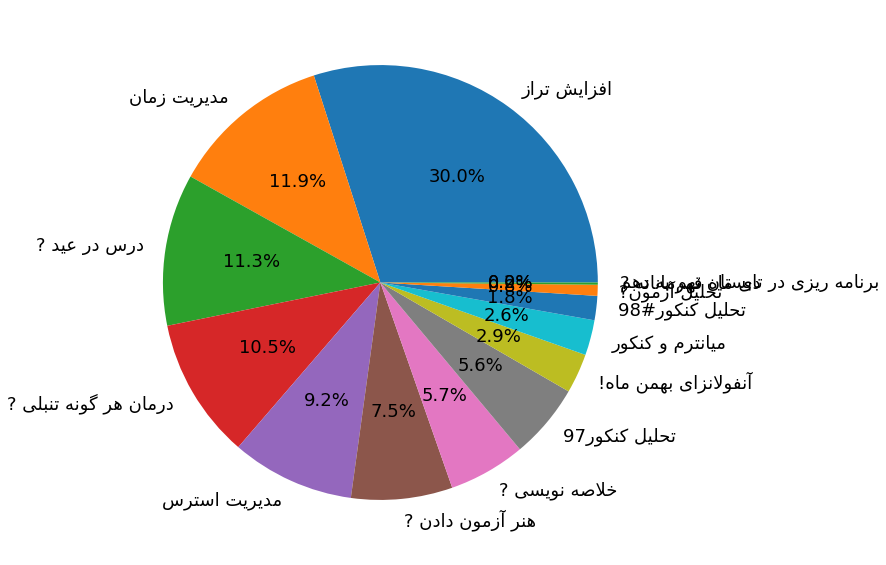

Visualized due to each championship route's total number of comments.


In [186]:
#Visualizing 
titles = []
n = list(trending_chr['number_of_comments'])
l = list(trending_chr.index)

from bidi.algorithm import get_display
import arabic_reshaper

labels = []
for data in l:
    reshaped_text = arabic_reshaper.reshape(data)
    artext = get_display(reshaped_text)
    labels.append(artext)
    
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 10)
ax1.pie(n, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.show()
print("Visualized due to each championship route's total number of comments.")

## Most viewed contents & & championship routes:

In [187]:
import pandas as pd

In [188]:
#reading visitans' data.
visitants = pd.read_csv('~/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/visitants.csv')
#reading contents' data.
contents = pd.read_csv('/home/arash/Course/Data_Science/Khishaavere/khishavere_data_export_980431/csv_format/contents.csv')

In [189]:
#calculating the number of views of each content.
num_of_views = visitants['entityable_id'].value_counts()
#creating a data frame as what we calculated.
views = pd.DataFrame(num_of_views)
#Renaming columns to their correct names.
views.reset_index(inplace = True)
views.rename(columns={'index':'entityable_id', 'entityable_id':'count'}, inplace = True)

In [190]:
#merging two data frames so we can see what content most viewed.
most_viewed = pd.merge(views[['entityable_id', 'count']],
               contents,
               left_on = 'entityable_id',
                       right_on = 'id', how='inner')
#setting index to content's id.
most_viewed.set_index('entityable_id', inplace = True)
#dropping unuseful columns.
most_viewed = most_viewed.drop(['author', 'guest', 'slider'], axis = 1)
#most_viewed['percentage_of_views'] = round((most_viewed['count'] / num_of_views.sum())*100, 3)
#Showing the results.
most_viewed.head()

count   id                                   title  \
entityable_id                                                       
79              2110   79             بزن بریم به سوی افزایش تراز   
59              1764   59                    کتاب و کلاس کمک درسی   
106             1515  106               ببینیم مدرس این دوره کیه؟   
89              1270   89  واقعا دیگه تلاش کردن فایده ای نداره؟؟!   
80              1203   80                               مدرس دوره   

                                                     description  \
entityable_id                                                      
79             پس معلومه بالاخره میخوای یه کاری برای افزایش ت...   
59             دوستات همشون میگن کلی کلاس ثبت نام کردن؟؟؟نگرا...   
106            معرفی محمد حسین جدیدی نژاد؛ مدرس دوره مدیریت زمان   
89             اگر قرار بود موفق بشیم تا الان شده بودیم پس تل...   
80             میخوای بدونی کسی که قراره تو این مسیر گام به گ...   

              content_category  content_score  number_of_scores  \
entityable_id                                                     
79                  Kimimishen           3.30               732   
59                  Kimimishen           3.08               195   
106                 Kimimishen           3.16               361   
89                    Kimia_TV           3.27               213   
80                  Kimimishen           3.21               220   

               number_of_comments  price  kimia_meter       mime     size  \
entityable_id                                                               
79                             53      0            1  video/mp4  7309029   
59                             36      0            1  video/mp4  2302616   
106                            28      0            1  video/mp4  5208393   
89                             20      0            1  video/mp4  8936317   
80                             12      0            1  video/mp4  5208393   

               duration           created_at  
entityable_id                                 
79                   87  2018-10-14 15:07:15  
59                   40  2018-10-13 01:21:11  
106                  89  2018-10-30 15:02:34  
89                  308  2018-10-15 00:28:01  
80                   89  2018-10-14 15:12:17

This is most viewed contents with percentage of each content's views to the total views of all contents in the app.

In [191]:
#Merge to have most viewed contents and their chapmpionship route in same tables.
most_viwed_chr = pd.merge(most_viewed,
        championships_contents,
        left_on = 'id',
        right_on = 'content_id')
most_viwed_chr = pd.merge(most_viwed_chr,
        championship_routes,
        left_on = 'championship_id',
        right_on = 'id')
#Find out most viewed championship routes.
most_viwed_chr = most_viwed_chr.groupby('title_y').sum()
most_viwed_chr = most_viwed_chr.sort_values(by = ['count'], ascending = False)
most_viwed_chr = most_viwed_chr.take([0], axis = 1)

most_viwed_chr

count
title_y                                 
افزایش تراز                         6491
مدیریت زمان                         3316
مدیریت استرس                        1613
تحلیل کنکور97                       1300
میانترم و کنکور                     1243
آنفولانزای بهمن ماه!                1111
درمان هر گونه تنبلی ?               1099
درس در عید ?                        1057
هنر آزمون دادن ?                     953
خلاصه نویسی ?                        411
تحلیل آزمون?                         146
تحلیل کنکور#98                       110
برنامه ریزی در تابستان نهم به دهم     29
دی ماه قهرمانانه ?                    26

Most viewed championship routes and number of their views.

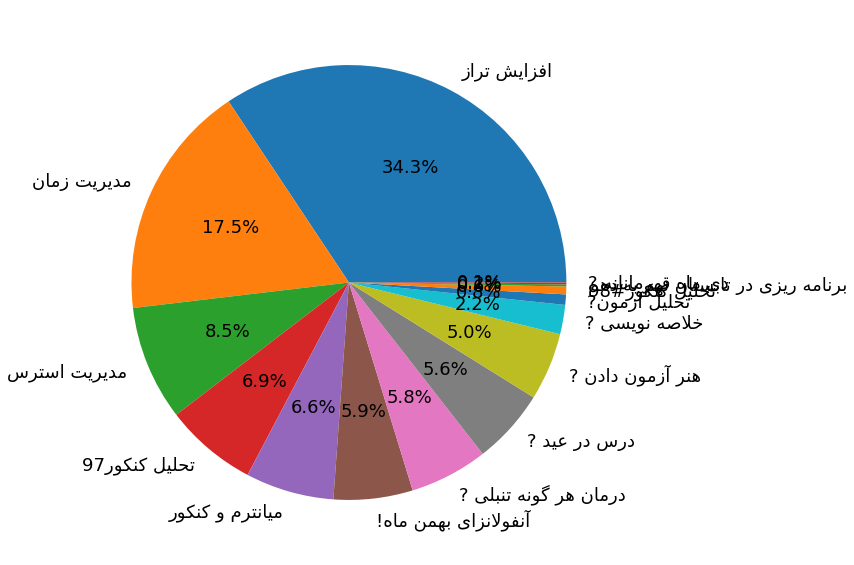

Visualized due to each championship route's total number of comments.


In [192]:
#Visualizing 
titles = []
n = list(most_viwed_chr['count'])
l = list(most_viwed_chr.index)

from bidi.algorithm import get_display
import arabic_reshaper

labels = []
for data in l:
    reshaped_text = arabic_reshaper.reshape(data)
    artext = get_display(reshaped_text)
    labels.append(artext)
    
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 10)
ax1.pie(n, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.show()
print("Visualized due to each championship route's total number of comments.")